# Сборный проект 1. Предобработка данных.
# Исследования определяющих факторов успешности игры.
## Краткое описание проекта
Интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры просит выявить определяющие факторы успешности игры. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные компании. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

## Техническое задание

1. **Провести предобработку данных**

- Обработать пропуски в данных.
- Проверить данные на аномальные значения.
- Привести названия столбцов к "змеиному_шрифту".
- Посчитайть суммарные продажи во всех регионах и записать их в отдельный столбец.

2. **Провести исследовательский анализ данных**

- Изучить сколько игр выпускалось в разные годы.
- Посмотреть как менялись продажи по платформам.
- Определить срок жизни платформ.
- Определить актуальный период.
- Выдилить платформы, которые являются лидерами по продажам на актуальный период.
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
- Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Сделать выводы.
- Посмотрите на общее распределение игр по жанрам.

3. **Составить портрет пользователя каждого региона**

- Определить ТОП-5 самых популярных платформ по каждому региону.
- Определить ТОП-5 самых продаваемых жанров игр по каждому региону.
- Определить, как рейтинг ESRB влияет на продаже в каждом отдельном регионе.

4. **Проверить гипитезы**

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Средние пользовательские рейтинги жанров Action и Sports разные.

### Загрузка и знакомство с данными

In [1]:
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод**

Первое, что бросается в глаза это название столбцов - их необходимо поменять. Второе это достаточно большое количество пропусков в данных, так же значение года выпуска должно быть типа **Int16**. Можно переходить к предобработке.

### Предобработка данных

Первое, что необходимо сделать на этом этапе это сохранить исходный размер таблицы, чтобы в конце предобработки узнать какой процень данных мы потеряли и проверить данные на наличие явных дубликатов.

In [4]:
data_before_treatments = data.shape[0]
data_before_treatments

16715

In [5]:
print('Количиство явных дубликатов:', data.duplicated().sum())

Количиство явных дубликатов: 0


Теперь необходимо привести название столбцов к нижнему регистру.

In [6]:
data.rename(
    columns=lambda x: x.lower(),
    inplace=True
)
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [7]:
for column in ['name', 'platform', 'genre', 'rating']:
    data[column] = data[column].str.lower()

In [8]:
data.loc[:, ['name', 'platform', 'genre', 'rating', 'year_of_release']].duplicated().sum()

2

In [9]:
data.drop_duplicates(
    subset=['name', 'platform', 'genre', 'rating', 'year_of_release'],
    inplace=True
)

In [10]:
data.loc[:, ['name', 'platform', 'genre', 'rating', 'year_of_release']].duplicated().sum()

0

Дубликаты в данных были хорошо спрятаны, но с ними мы разобрались (удалили их).

In [11]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [12]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = False)
            .plot(kind = 'bar', figsize = (19,6), fontsize = 16, legend=False, rot=0)
            .set_title('Доля пропущеных значений по каждому столбцу' + "\n",
                       fontsize = 20,
                       fontweight='bold'
                       )    
        );
        plt.ylabel('Процент пропусков от общего объема данных', fontsize=14)
        plt.xlabel('Названия столбцов', fontsize=14)
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции')

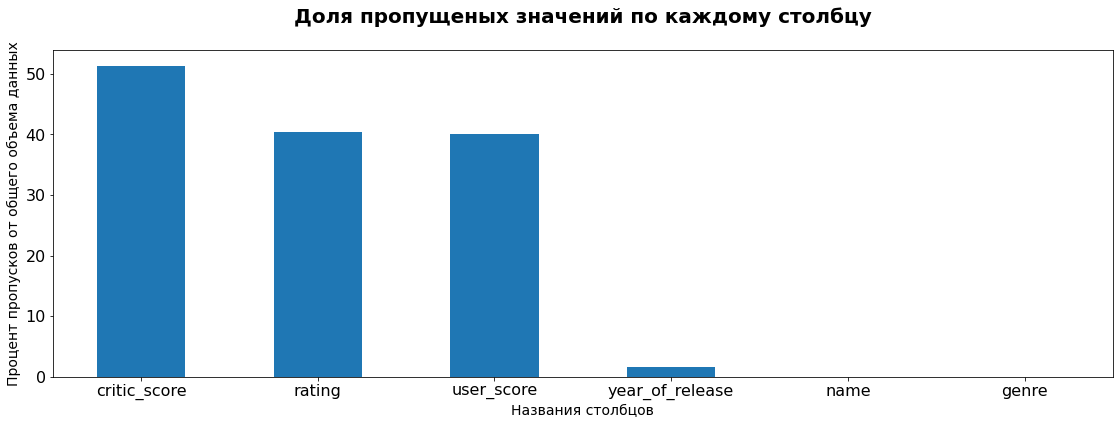

In [13]:
pass_value_barh(data)

Так же игры имена которых, можно удалить. Мы должны знать, что мы изучаем.

In [14]:
data.dropna(subset=['name'], inplace=True)

Основные преобразования проведены. Можно переходить к более подробной предобработке (по каждому столбцу).

#### platform

In [15]:
data['platform'].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

Пропусков и дубликатов в столбце **platform** нет - значит можно переходить к изучению следующего столбца.

#### year_of_release

Сначала рассмотрим пропуски.

In [16]:
data['year_of_release'].isna().sum()

269

In [17]:
data[data['year_of_release'].isna()].groupby('platform')['name'].count()

platform
2600    17
3ds      8
ds      30
gb       1
gba     11
gc      14
n64      3
pc      17
ps       7
ps2     34
ps3     25
psp     16
psv      1
wii     34
x360    30
xb      21
Name: name, dtype: int64

В таблице **269** строк с пропкском в столбце **year_of_release**. Скорее всего эти пропуски возникли из-за какой-то ошибки во время переноса данных в таблицу, но большинство игр выходят сразу на несколько платформ, поэтому мы можем попробовать заполнить пропуски в некоторых строках, но этот метод врядли поможет заполнить нам все пропуски. Во время проверки выяснилось, что этот способ искажает данные, так же дополнительная проверка дала понять, что данные пропущены в большинстве у тех платформ, которые на являются актуальными на 2016 год и если мы удалим эти пропуски - мы ничего не потеряем.

In [18]:
data.dropna(subset=['year_of_release'], inplace=True)

In [19]:
data['year_of_release'].isna().sum()

0

Можно поменять тип данных в столбце **yaer_of_release** на **int16**.

In [20]:
data['year_of_release'] = pd.to_numeric(data['year_of_release'], downcast='integer')

In [21]:
data.dtypes

name                object
platform            object
year_of_release      int16
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

#### genre

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int16  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       9838 non-null   object 
 10  rating           9767 non-null   object 
dtypes: float64(5), int16(1), object(5)
memory usage: 1.4+ MB


В данном столбце редактировать нечего.

#### na_sales

Пропусков в этом столбце нет, поэтому нужно изучить данные методом .describe() и изучить распределение данных в этом столбце.

In [23]:
data['na_sales'].describe()

count    16443.000000
mean         0.264028
std          0.818400
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

Предлагаю изучить данные без нулевых значений.

In [24]:
data.loc[data['na_sales'] > 0]['na_sales'].describe()

count    11995.000000
mean         0.361936
std          0.939536
min          0.010000
25%          0.060000
50%          0.140000
75%          0.340000
max         41.360000
Name: na_sales, dtype: float64

Так как более **25** данных равны нулю, при рассмотрении распределения не будем учитывать эти значения, чтобы они не портили вид нашего распределения. Среднее значение значительно больше чем медианное, поэтому можно сказать, что данные имеют выбросы с большей стороны (так же об этом говорит достаточно большое стандартное отклонение), но удалять мы их не станем, потому что это самые продаваемы проекты.

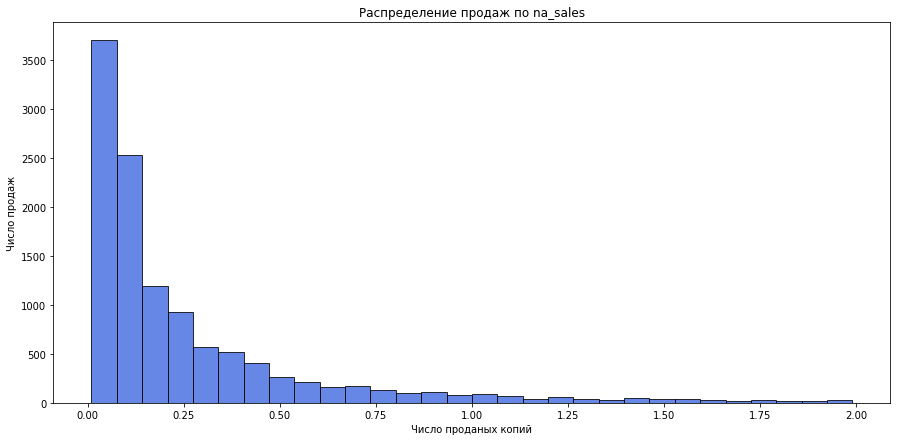

In [25]:
plt.figure(figsize=(15, 7))

plt.hist(
    data['na_sales'].loc[(data['na_sales'] < 2) & (data['na_sales'] > 0)],
    bins=30,
    histtype='bar',
    color='#4169E1',
    edgecolor='black',
    alpha=0.8
)

plt.title('Распределение продаж по na_sales')
plt.xlabel('Число проданых копий')
plt.ylabel('Число продаж')
plt.show()

#### eu_sales

Пропусков в этом столбце нет, поэтому посмотрим, как в нем распредеоены значения и изучим их методом .describe().

In [26]:
data['eu_sales'].describe()

count    16443.000000
mean         0.145939
std          0.506731
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64

Предлагаю рассмотреть данные без нулевых значений.

In [27]:
data.loc[data['eu_sales'] > 0]['eu_sales'].describe()

count    10677.000000
mean         0.224751
std          0.614608
min          0.010000
25%          0.020000
50%          0.070000
75%          0.200000
max         28.960000
Name: eu_sales, dtype: float64

По данным видно, что большинство значений находятся около нуля (более **75%**). Как и в случае со столбцом **na_sales** медианное значение намного меньше среднего - это говорит о том, что самые большие значения свинуты вправо (так же об этом говорит высокое стандартное отклонение).

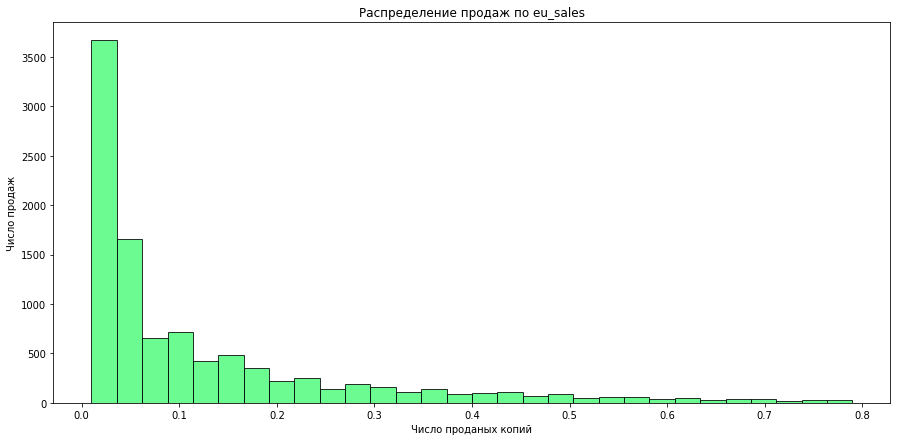

In [28]:
plt.figure(figsize=(15, 7))

plt.hist(
    data['eu_sales'].loc[(data['eu_sales'] < 0.8) & (data['eu_sales'] > 0)],
    bins=30,
    histtype='bar',
    color='#46fa76',
    edgecolor='black',
    alpha=0.8
)

plt.title('Распределение продаж по eu_sales')
plt.xlabel('Число проданых копий')
plt.ylabel('Число продаж')
plt.show()

#### jp_sales

Пропусков в этом столбце нет, поэтому посмотрим, как в нем распредеоены значения и изучим их методом .describe().

In [29]:
data['jp_sales'].describe()

count    16443.000000
mean         0.078492
std          0.311109
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

Предлагаю рассмотреть данные без нулевых значений.

In [30]:
data.loc[data['jp_sales'] > 0]['jp_sales'].describe()

count    6144.000000
mean        0.210065
std         0.481057
min         0.010000
25%         0.030000
50%         0.070000
75%         0.190000
max        10.220000
Name: jp_sales, dtype: float64

По данным видно, что в этом регионе значительно меньше ненулевых продаж. Как и во всех остальных случаях большинство продаж находятся около нуля и больште значения смещены вправо, но в этот раз не так сильно. Медианное значение намного меньше среднеарифметического, стандартное отклонение не такое большое как в предыдущих случаях.

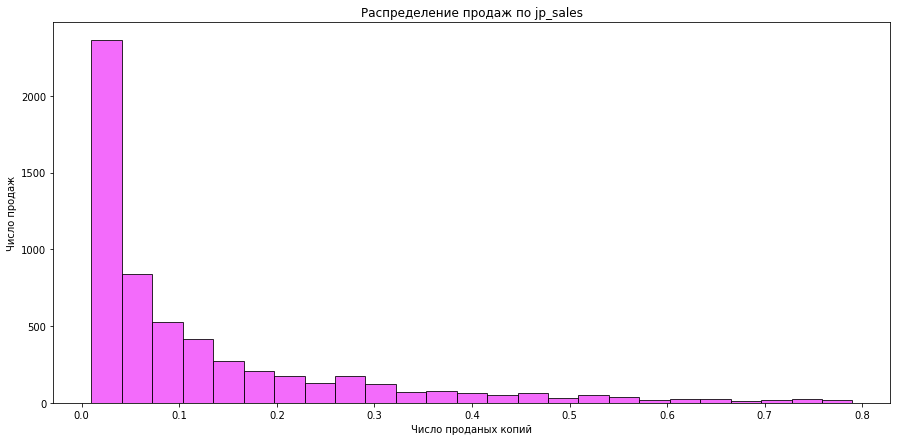

In [31]:
plt.figure(figsize=(15, 7))

plt.hist(
    data['jp_sales'].loc[(data['jp_sales'] < 0.8) & (data['jp_sales'] > 0)],
    bins=25,
    histtype='bar',
    color='#f146fa',
    edgecolor='black',
    alpha=0.8
)

plt.title('Распределение продаж по jp_sales')
plt.xlabel('Число проданых копий')
plt.ylabel('Число продаж')
plt.show()

#### other_sales

Пропусков в этом столбце нет, поэтому посмотрим, как в нем распредеоены значения и изучим их методом .describe().

In [32]:
data['other_sales'].describe()

count    16443.000000
mean         0.047597
std          0.188011
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64

Предлагаю рассмотеть данные без нулевых значений.

In [33]:
data.loc[data['other_sales'] > 0]['other_sales'].describe()

count    9952.000000
mean        0.078640
std         0.236567
min         0.010000
25%         0.010000
50%         0.020000
75%         0.070000
max        10.570000
Name: other_sales, dtype: float64

В данном столбце в отличае от предыдущих медианное значение не так сильно отличается от среднего (но все равно различае значительное). Большинство значений находится около нуля (более **75%**). Все больште значения смещены вправо.

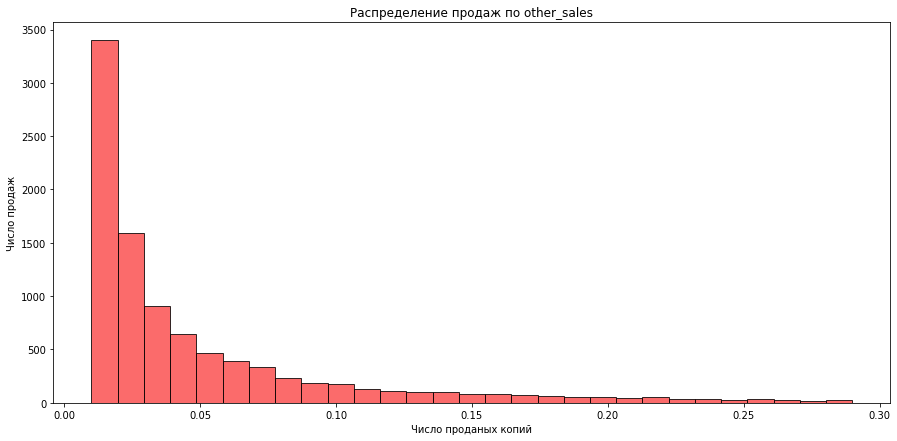

In [34]:
plt.figure(figsize=(15, 7))

plt.hist(
    data['other_sales'].loc[(data['other_sales'] < 0.3) & (data['other_sales'] > 0)],
    bins=29,
    histtype='bar',
    color='#fa4646',
    edgecolor='black',
    alpha=0.8
)

plt.title('Распределение продаж по other_sales')
plt.xlabel('Число проданых копий')
plt.ylabel('Число продаж')
plt.show()

***Общий вывод по столбцам na_sales, eu_sales, jp_sales и other_sales***

Все распределения выглядят практичекски одинаково. Больше всего продаж в **na_sales**, меньше всего в **jp_sales**. Категории **na_sales** и **eu_sales** выглядят практически одинаково. У всех столбцов большинство значение собрано около нуля - это можно объяснить тем, что в датафрейме собрано много информации об играх, которые были разработаны маленькими студиям, или играх, которые просто плохо продавались.

#### critic_score

Для начала рассмотрим строки в которых пропущены значения.

In [35]:
data['critic_score'].isna().sum()

8461

In [36]:
data[data['critic_score'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [37]:
data[data['critic_score'].isna()].tail()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,winning post 8 2016,psv,2016,simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


Видно, что у пропущеные значения в этом столбце есть как у очень популярынх игр у которых более **30 млн.** проданых копий, так и у совсем не больштх проектов. По данным видно, что в основном пропуски совпадают в трех последнийх столбцах.

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int16  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       9838 non-null   object 
 10  rating           9767 non-null   object 
dtypes: float64(5), int16(1), object(5)
memory usage: 1.4+ MB


Но как видно из общей информации о датафрейме, количество пропусков в них не одинаково. В столбцах **user_score** и **rating** пропусков немного меньше. 

Мы не можеи ничего сделать с этими пропусками, так как средним заполнять их не справедливо, потому что игры не зависят друг от друга и оценка одной из них почти никак не влияет на оценку другой. Удалить эти значения нельзя, потому что мы сразу же потеряем половину данных. 

Поэтому просто проверим, чтобы в этот столбец не попали аномальные значения и оставим его так как есть.

Если говорить о пропусках в столбце critic_score, то причиной их появления могла быть непопулярности игры или ошибка при переносе данных (данные могли просто забыть внести в таблицу). Если же говорить о всех трех столбцах, что упомянаются ячейкой выше, то это могли быть те же самые причины, только в столбце user_score добавляется причина того, что большинство пропусков принадлежат играм с рейтингом E (это позволяет предположить, что в нее играют дети и они просто не знают как поставить игре какю-либо оценку).
        

In [39]:
data['critic_score'].describe()

count    7982.000000
mean       68.992608
std        13.920049
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

Видно, что с данными все в порядке. Средняя оценка критиков равна примерно **69-ти** баллам, медианная **71-му** баллу.
большинство значений меньше **79-ти** баллов, а максимальная оценка равна **98-ми** баллам.

#### user_score

Сначала рассмотри пропущенные значения.

In [40]:
data['user_score'].isna().sum()

6605

In [41]:
data[data['user_score'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [42]:
data[data['user_score'].isna()].tail()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,winning post 8 2016,psv,2016,simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


Все точно так же, как и в столбце **critic_score**. Поэтому все, что нам остается это разобраться почему этот столбец имеет тип **object** и есть ли в нем аномльные значения.

In [43]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Столбец имеет такой тип из-за значения **tbd** - **to be determined** (будет определено позднее). Нужно внимательнее рассмотреть строки в котрых это столбец имеет такие значения и подумать, на что можно его заменить для упрощения анализа в дальнейшем.

In [44]:
data[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,zumba fitness,wii,2010,sports,3.45,2.59,0.0,0.66,NaN,tbd,e
301,namco museum: 50th anniversary,ps2,2005,misc,2.08,1.35,0.0,0.54,61.0,tbd,e10+
520,zumba fitness 2,wii,2011,sports,1.51,1.03,0.0,0.27,NaN,tbd,t
645,udraw studio,wii,2010,misc,1.65,0.57,0.0,0.20,71.0,tbd,e
718,just dance kids,wii,2010,misc,1.52,0.54,0.0,0.18,NaN,tbd,e
...,...,...,...,...,...,...,...,...,...,...,...
16695,planet monsters,gba,2001,action,0.01,0.00,0.0,0.00,67.0,tbd,e
16697,bust-a-move 3000,gc,2003,puzzle,0.01,0.00,0.0,0.00,53.0,tbd,e
16698,mega brain boost,ds,2008,puzzle,0.01,0.00,0.0,0.00,48.0,tbd,e
16704,plushees,ds,2008,simulation,0.01,0.00,0.0,0.00,NaN,tbd,e


Предлагаю поменять значения **tbd** на **NaN**, чтобы они не мешали последующему анализу. Судя по таблице такие занчения в большинстве своем у игр с рейтингом для детей (**E** - для всех возрастов, но в основном в таки игры играют дети; **E10+** - для лиц старше 10ти лет; **T** - подростки, а точнее 13+), возможно с этим и связано такое значение в столбце **user_score**, так как дети не знают (не могут) как оценить игры.

##### check nan

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int16  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       9838 non-null   object 
 10  rating           9767 non-null   object 
dtypes: float64(5), int16(1), object(5)
memory usage: 1.4+ MB


In [46]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int16  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   object 
 10  rating           9767 non-null   object 
dtypes: float64(5), int16(1), object(5)
memory usage: 1.4+ MB


In [48]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Теперь мы можем поменять тип данных, это необходимо для последующего анализа. Менять будем на **float32**, в целях экономии памяти.

In [49]:
data['user_score'] = pd.to_numeric(data['user_score'], downcast='float')
data.dtypes

name                object
platform            object
year_of_release      int16
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float32
rating              object
dtype: object

Пропущеных значений от этого только прибавилось, но ничего сделать с ними мы не сможем, потому что заполнить их средним или медианным будет некорректно, так как данные не зависят друг от друга. Удалить их нельзя потому что мы потеряем больше половины данных. Поэтому оставляем все как есть.

In [50]:
data['user_score'].describe()

count    7462.000000
mean        7.126547
std         1.499429
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

Средняя оценка пользователя равна примерно **7.13**, а медианная **7.5**. Большинство оценок ментьше **8.2**. Максимальный балл равен **9.7**

#### rating

In [51]:
data['rating'].isna().sum()

6676

In [52]:
data['rating'].unique()

array(['e', nan, 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'], dtype=object)

In [53]:
data['rating'].value_counts()

e       3920
t       2905
m       1536
e10+    1393
ec         8
k-a        3
rp         1
ao         1
Name: rating, dtype: int64

В данных есть некотрые упущения
   - K-A это устаревшее обозначение E
   - EC можем заменить на E, так как это фактически одно и то же и ткое всего одно значение
   - RP можно заменить на NaN, так как оно значит именно это (Rating Pending)
   
Исправим это

##### check

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int16  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float32
 10  rating           9767 non-null   object 
dtypes: float32(1), float64(5), int16(1), object(4)
memory usage: 1.3+ MB


In [55]:
data.loc[(data['rating'] == 'K-A') | (data['rating'] == 'EC'), 'rating'] = 'E'
data.loc[data['rating'] == 'RP'] = np.nan

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float32
 10  rating           9767 non-null   object 
dtypes: float32(1), float64(6), object(4)
memory usage: 1.4+ MB


Проверим, что изменения произошли.

In [57]:
data['rating'].value_counts()

e       3920
t       2905
m       1536
e10+    1393
ec         8
k-a        3
rp         1
ao         1
Name: rating, dtype: int64

Теперь этот столбец заполнен корректно, но в нем все еще большое количество пропусков. Это может быть связано с ошибкой при выгрузке данных, а может быть, потому что большинство игр от небольших компаний, которые на проверяются рейтингом ESRP.

#### Добавление столбца с суммой продаж по всем регионам

In [58]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


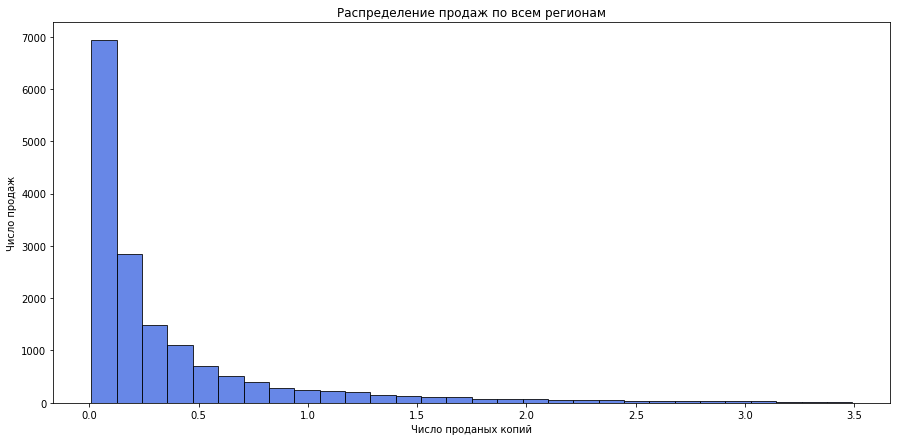

In [59]:
plt.figure(figsize=(15, 7))

plt.hist(
    data['total_sales'].loc[(data['total_sales'] < 3.5) & (data['total_sales'] > 0)],
    bins=30,
    histtype='bar',
    color='#4169E1',
    edgecolor='black',
    alpha=0.8
)

plt.title('Распределение продаж по всем регионам')
plt.xlabel('Число проданых копий')
plt.ylabel('Число продаж')
plt.show()

In [60]:
data.loc[data['total_sales'] > 0, 'total_sales'].describe()

count    16441.000000
mean         0.536121
std          1.558911
min          0.010000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

Это распределение выглядит почти так же, как распределение всех этих столбцов по отдельности. Стандартное отклонение все еще большое и медианное значение в несколько раз меньше среднего - это значит, что все большие значения сильно смещены вправо.

Максимальная сумма продаж по всем регионам равно **82.54 млн. копий**.

#### Общий вывод по предобработке данных.

Были предоставлены данные достаточно высокого качется, конечно в них нашлись ошибки, но они были не критичны
   - на этапе предобработки были убраны (если это возможно) пропуски данных
   - удалены дубликаты явные и неявные
   - проверены все аномальные значеия
   - процент потерянных данных составил примерно 0.02%
   
Можно переходить к исследовательскому анализу данных.

In [61]:
1 - data.shape[0] / data_before_treatments

0.016272808854322474

### Исследовательский анализ данных

#### Определение сколько игр выпускалось в разные годы и все ли периоды важны.

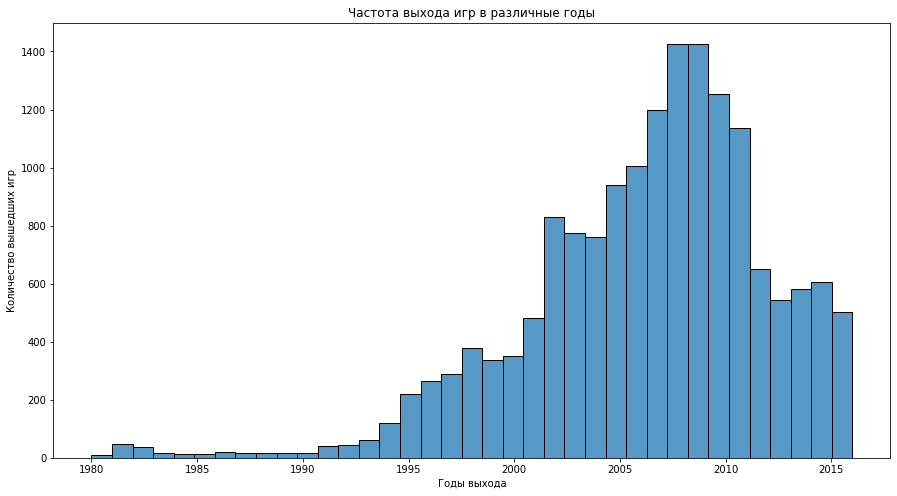

In [62]:
plt.figure(figsize=(15, 8))
sns.histplot(data=data[data['year_of_release'] > 0],
             x='year_of_release',
             bins=37,
)
plt.title('Частота выхода игр в различные годы')
plt.xlabel('Годы выхода')
plt.ylabel('Количество вышедших игр')
plt.show()

Как видно из графика до 1990 года игры выходили очень редко и к 2016 они уже порядком устарели, поэтому в дальнейшем анализе этими данными можно будет принебречь. Больше всего игр вышло в период с 2006 по 2007 год. Небольшое количество игр вышедших на период с 2016 года можно объяснить тем, что год еще не закончился и сами игры стали масштабнее и требуют больше времени для разработки.

#### Изучение изменения количества продаж по платформам

Для начала нужно найти платформы которые были самыми популярными за все время. Предлагаю рассмотреть топ 20 платформ за все время, так как мне кажется такое количиство будет оптимальным.

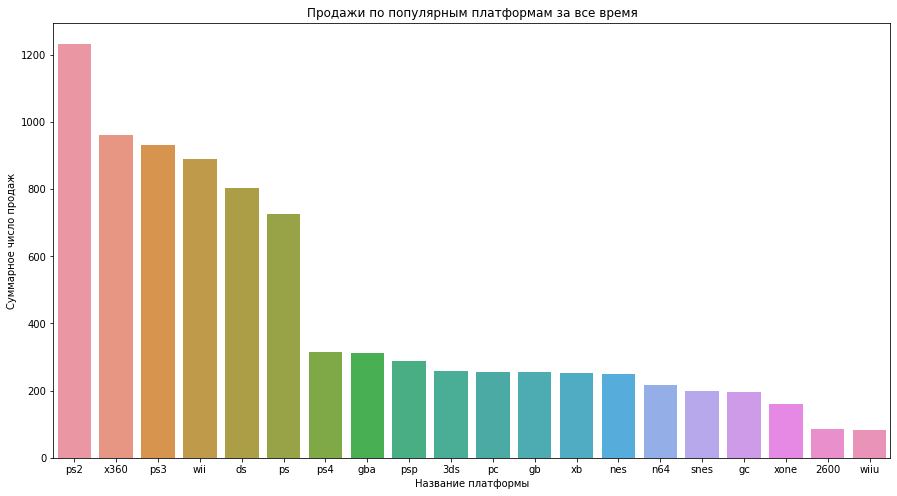

,total_sales
platform,
ps2,1233.56
x360,961.24
ps3,931.33
wii,891.18
ds,802.78
ps,727.58
ps4,314.14
gba,312.88
psp,289.53


In [63]:
top_platforms = (data
                 .pivot_table(
                     index='platform',
                     values='total_sales',
                     aggfunc='sum'
                 )
                 .sort_values(
                     by='total_sales',
                     ascending=False
                 )
                 .head(20)
)
plt.figure(figsize=(15, 8))
sns.barplot(data=top_platforms, x=top_platforms.index, y=top_platforms['total_sales'])
plt.title('Продажи по популярным платформам за все время')
plt.xlabel('Название платформы')
plt.ylabel('Суммарное число продаж')
plt.show()
top_platforms

Из полученных данных видно, что самой популярной платформой за вме время является PS2. На втором месте XBOX360, на третьем PS3. Нижним пределолм нашего топа является приставка WiiU.

Теперь необходимо рассмотреть как долго существовала каждая из этих платформ за весь период, что представлен в датафрейме.

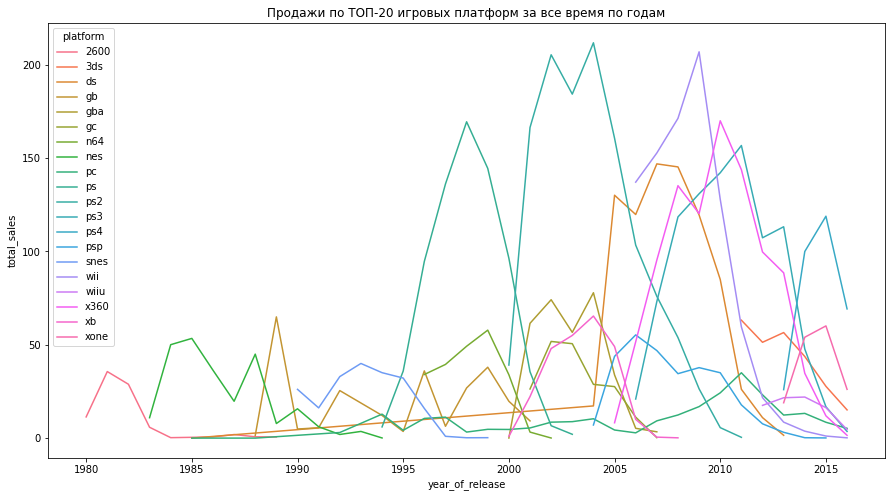

,min,max,years_of_life
platform,,,
pc,1985.0,2016.0,31.0
ds,1985.0,2013.0,28.0
gb,1988.0,2001.0,13.0
x360,2005.0,2016.0,11.0
psp,2004.0,2015.0,11.0
ps2,2000.0,2011.0,11.0
nes,1983.0,1994.0,11.0
dc,1998.0,2008.0,10.0
wii,2006.0,2016.0,10.0


In [64]:
def lines_plotting(data: 'pd.DataFrame', year: 'int16', title: 'str') -> None:
    '''
    Функция строит и выводит на экранн график суммарных продаж рассчитанных по годам
    для платформ подподающем  под условие, в нашем случае топ-20 платформ за все время.
    '''
    plt.figure(figsize=(15, 8))
    plt.title(title)
    sns.lineplot(
        data=(data
              .query('year_of_release >= @year')
              .groupby(['platform', 'year_of_release'])['total_sales']
              .agg('sum')
              .reset_index()
             ),
        x='year_of_release',
        y='total_sales',
        hue='platform',
        markers=True
    )
    
    plt.show()
    
lines_plotting(data.query('platform in @top_platforms.index'),
                          1980,
                          'Продажи по ТОП-20 игровых платформ за все время по годам')

years_of_life = data.pivot_table(index='platform',values='year_of_release',aggfunc=['min','max'])
years_of_life.columns=['min','max']
years_of_life['years_of_life']=years_of_life['max']-years_of_life['min']
years_of_life

years_of_life.sort_values(by = 'years_of_life', ascending = False)

В этом графике тяжело разобраться, но он помогает сделать вывод о том, что в среднем игровая платформа остается актуальной на протяжении **10** лет, но популярной является около **5**, максимум **10** лет. В основном пик популярности игровой платформы находится почти у момента ее появления, а далее популярность снижается. Из-за этого подозрения вызывет платформа DS (платформа вышла в 2004 году). Из этого можно сделать вывод, что в данных ошибка и исправить ее.

Но нам необходимо изучить актуальные данные, поэтому нам нет смысла рассматривать данные с 1980 года. Во-первых, нам необходимо определить на какие платформы выходят игры в актуальное время (2016 год). Во-вторых, нужно рассмотреть такой же график по платформам на которые игры выпускаются сейчас и период возьмем начиная с 2000 года.

In [65]:
data.loc[(data['platform'] == 'ds') & (data['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,strongest tokyo university shogi ds,ds,1985.0,action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


Видимо при заполнении таблицы произошла какая-то ошибка. По данным из интернета эта игра вышла в 2010 году. Значит мы можем ее исправить! 

In [66]:
data.loc[(data['platform'] == 'ds') & (data['year_of_release'] == 1985), 'year_of_release'] = 2010
years_of_life.loc[years_of_life.index == 'ds', 'min'] = 2004 
years_of_life.loc[years_of_life.index == 'ds', 'years_of_life'] = (
    years_of_life.loc[years_of_life.index == 'ds', 'max'] - \
    years_of_life.loc[years_of_life.index == 'ds', 'min']
)

Рассмотрм график с исправленными данными

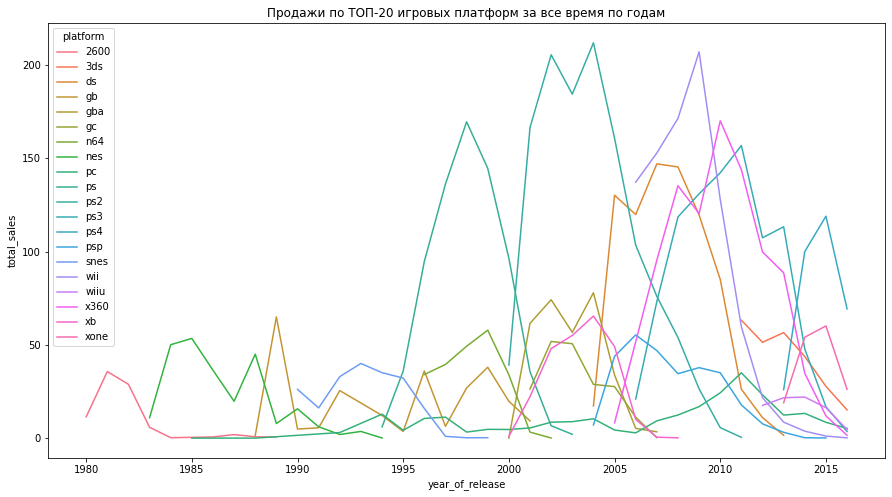

,min,max,years_of_life
platform,,,
2600,1980.0,1989.0,9.0
3do,1994.0,1995.0,1.0
3ds,2011.0,2016.0,5.0
dc,1998.0,2008.0,10.0
ds,2004.0,2013.0,9.0
gb,1988.0,2001.0,13.0
gba,2000.0,2007.0,7.0
gc,2001.0,2007.0,6.0
gen,1990.0,1994.0,4.0


In [67]:
lines_plotting(data.query('platform in @top_platforms.index'),
                          1980,
                          'Продажи по ТОП-20 игровых платформ за все время по годам')
years_of_life

In [68]:
actual_platforms = data.loc[data['year_of_release'] == 2016, 'platform'].unique()

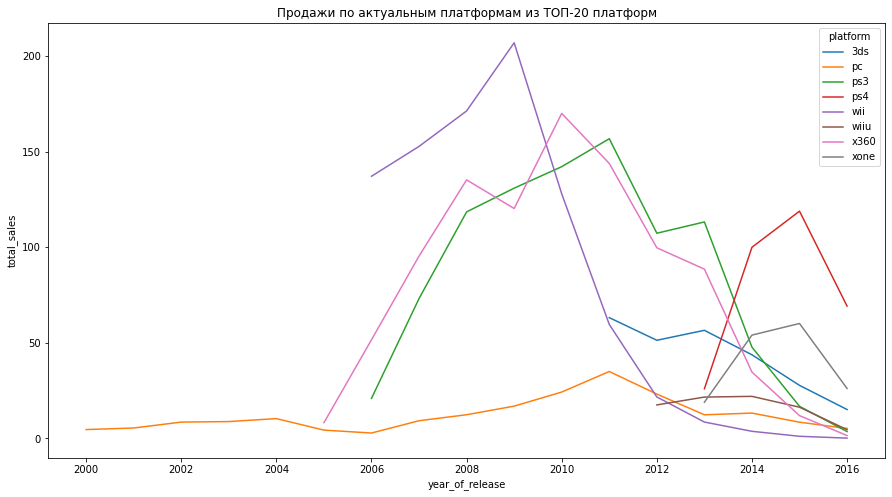

In [69]:
lines_plotting(data.query('platform in @top_platforms.index and platform in @actual_platforms'),
                          2000,
                          'Продажи по актуальным платформам из ТОП-20 платформ')


На графике видно, что актуальность платформ **PS3** и **X360** стала снижаться, потому что в **2013** году их заменили констоли нового покаления **PS4** и **XOne**.

Актуальным будем считать период с **2014** года.

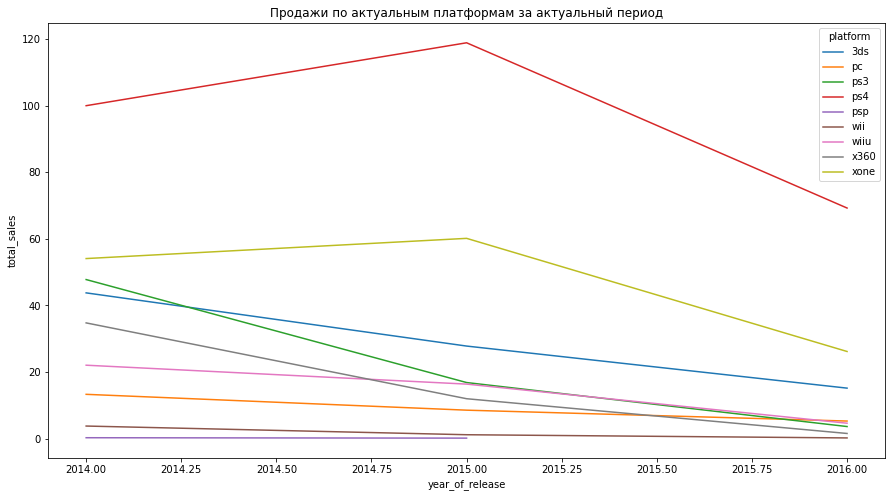

In [70]:
lines_plotting(data.query('platform in @top_platforms.index'),
                          2014,
                          'Продажи по актуальным платформам за актуальный период')

По данным видно, что самой актуальной платформой на данном периоде являеься **PS4**, наименее актуальной - **wii**. Спад актульности всех платформ в 2016 году можно объяснить тем, что таблица заполнена не полностью, так как год еще не кончился. Даные по psp учитывть не будет, так как в 2015 году на нее перестали выпускать игры.

Создадим новый датафрейм на основе исходного, в котором будуь храниться данные только об актуальных платформах за актуальный период.

In [71]:
data_actual = data.query('year_of_release >= 2014')

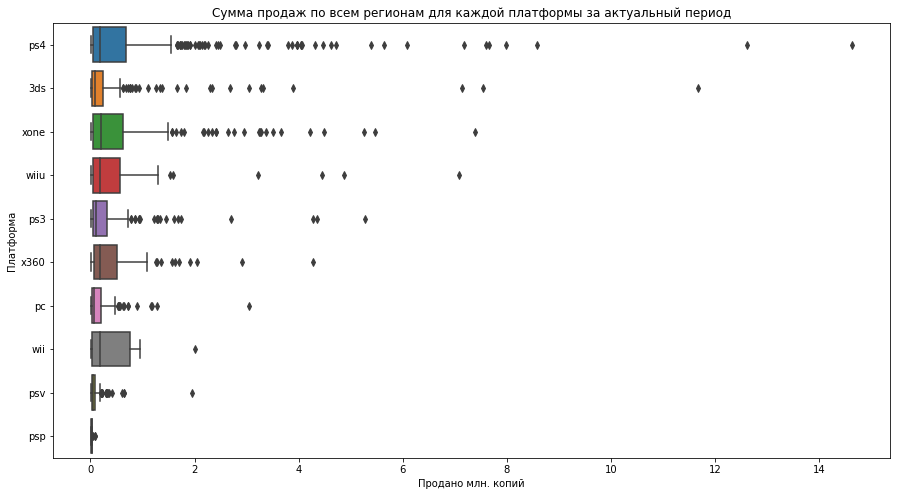

count    1689.000000
mean        0.431883
std         1.056109
min         0.010000
25%         0.030000
50%         0.100000
75%         0.350000
max        14.630000
Name: total_sales, dtype: float64

In [72]:
plt.figure(figsize=(15, 8))

sns.boxplot(data=data_actual,
            x='total_sales',
            y='platform',
            width=0.8,
)
plt.title('Сумма продаж по всем регионам для каждой платформы за актуальный период')
plt.xlabel('Продано млн. копий')
plt.ylabel('Платформа')
plt.show()

data_actual['total_sales'].describe()

Данный график может многое рассказать о самых продоваемых играх, но на нем не разглядеть ни межквартильного размаха не медианы. Но зато с уверенность можно сказать, что самая продаваемая игра за актуадьный период вышла на ps4 - ее продали тиражом в 14.63 млн. копий, так же за этот период на эту платформу вышло две игры которые продались тиражом более 10 млн. копий. Такая же игра есть и у платформы WiiU, но за рассматриваемы период она всего одна. Медианное значение по всем платформам равно 0.1 млн. копий, большинство игр продались тиражем менее 0.35 млн. копий.

Предлагаю уменьшить масштаб и расмотреть данные так, чтобы было видно первый и четвуртый квартили.

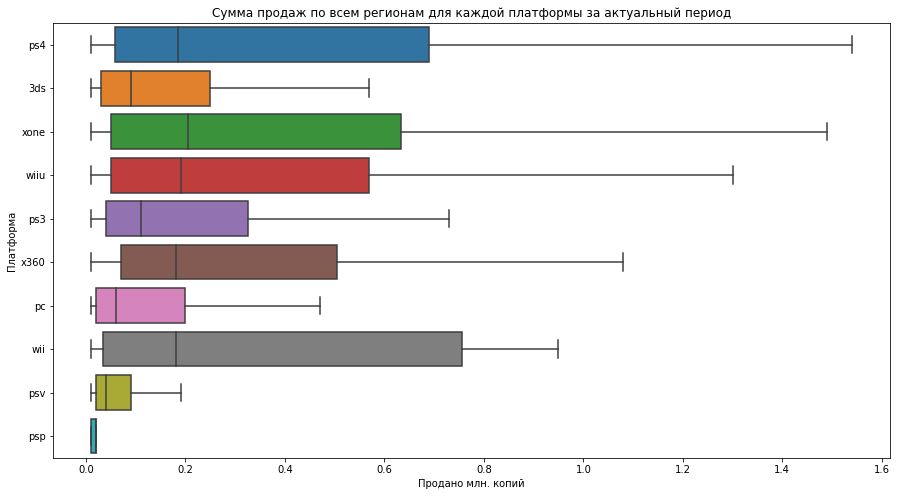

In [73]:
plt.figure(figsize=(15, 8))

sns.boxplot(data=data_actual,
            x='total_sales',
            y='platform',
            width=0.8,
            showfliers=False
)
plt.title('Сумма продаж по всем регионам для каждой платформы за актуальный период')
plt.xlabel('Продано млн. копий')
plt.ylabel('Платформа')
plt.show()

По этим данным можно сказать, что лучше всго на актуальном периоде игры лучще всего продаются на ps4, немног хуже на XOne, но медианное значение продаваемости игр у XOne немного больше - оно равно примерно 0.2 млн. копий, а у ps4 где-то 0.18 млн. копий. У Wii самый большой межквартильный размах - это может говорить о большом разбросе в данных.

Самый маленький боксплот получился для psp, но ее мы не будем учитывать, потому что эта платформа устарела, но все-таки продолжила существовать до наших дней - это потрясающе, но игр на нее не выходит, следственно и рекламировать и продавать на нее нечего.

По всем этим данным видно, что в данных все еще много выбросов, но как и в случаях выше это все нормально, потому что больштинство игр продается плохо (большая часть продаж меньше половины миллиона копий), но есть и игры, которые продаются десятками миллионов копий и подобные этим игры образуют выбросы в данных (но они крайне полезны для маркетлогов).

#### Проверка того, какотзывы влияют на продажи внутри одной из платформ.

Будем рассматривать влияние отзывов на продажи внутри самой актуальной и популярной платформе из рассматриваемых - **PS4**.

In [74]:
ps4_data = data_actual[data_actual['platform'] == 'ps4']

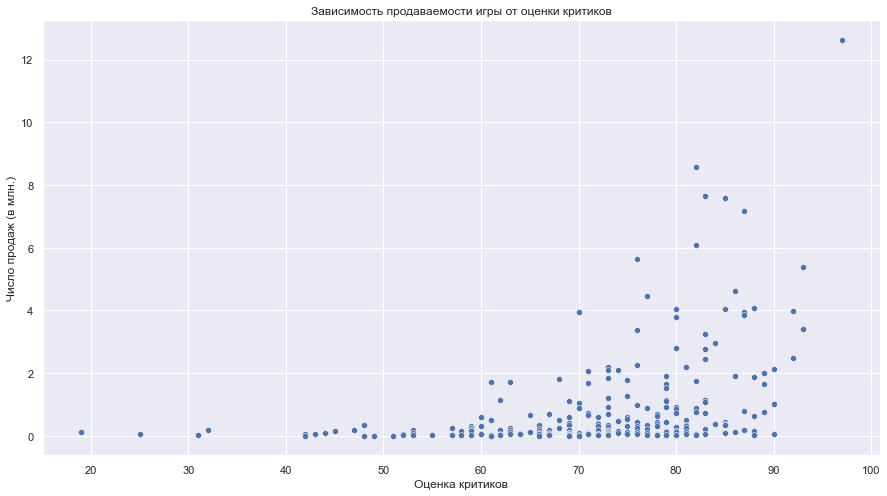

In [75]:
sns.set()
plt.figure(figsize=(15, 8))
sns.scatterplot(
    data=ps4_data,
    x='critic_score',
    y='total_sales',
)
plt.title('Зависимость продаваемости игры от оценки критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Число продаж (в млн.)')
plt.show()

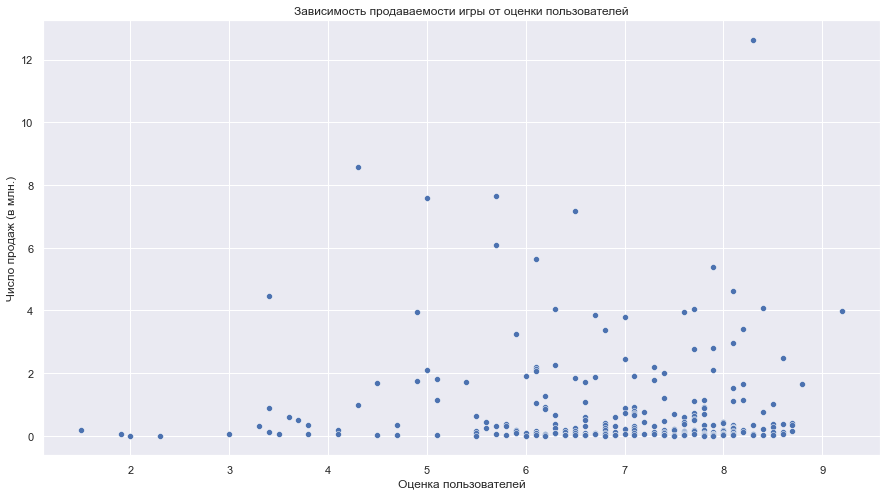

In [76]:
sns.set()
plt.figure(figsize=(15, 8))
sns.scatterplot(
    data=ps4_data,
    x='user_score',
    y='total_sales',
)
plt.title('Зависимость продаваемости игры от оценки пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Число продаж (в млн.)')
plt.show()

In [77]:
ps4_data[['critic_score', 'user_score', 'total_sales']].corr().round(2)

,critic_score,user_score,total_sales
critic_score,1.00,0.55,0.40
user_score,0.55,1.00,-0.04
total_sales,0.40,-0.04,1.00


По полученным данным видно, что корреляция между отзывами критиков и глобальными продажами присутствут - это так же можно сказать и по коэффициенту корреляции **0.40**, хоть он и не большой, но некоторая зависимость присутствует. А вот зависимости между продажами и оценками пользователей отсутствуют, это видно на графике и это показывает коэффициент корреляции.

Рассмотрим корреляцию для всех остальных платформ.

In [78]:
(
    data_actual.
    groupby('platform')[['critic_score', 'user_score', 'total_sales']]
    .agg('corr')
    .reset_index()
    .query('level_1 == "total_sales"')
    .iloc[:, [0, 1, 2, 3]]
    .round(2)
)

,platform,level_1,critic_score,user_score
2,3ds,total_sales,0.31,0.22
5,pc,total_sales,0.17,-0.07
8,ps3,total_sales,0.45,-0.17
11,ps4,total_sales,0.40,-0.04
14,psp,total_sales,NaN,NaN
17,psv,total_sales,0.04,-0.17
20,wii,total_sales,NaN,1.00
23,wiiu,total_sales,0.37,0.41
26,x360,total_sales,0.53,-0.14
29,xone,total_sales,0.43,-0.07


Коэффициент корреляции существует между оценками и критиков и продаваемостью игры существует для некоторых платформ, например для PS4, XOne, PS3, X360 он не мал, значит зависимость может существовать. 
Коэффициент корреляции с отзывами пользователей для платформы Wii равый 1 скорее всего ошибочный, предлагаю это проверить.

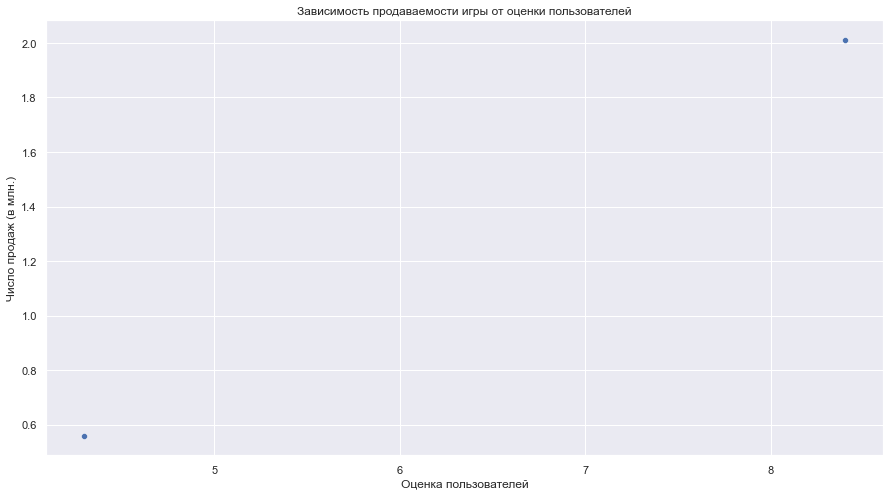

In [79]:
sns.set()
plt.figure(figsize=(15, 8))
sns.scatterplot(
    data=data_actual.query('platform == "wii"'),
    x='user_score',
    y='total_sales',
)
plt.title('Зависимость продаваемости игры от оценки пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Число продаж (в млн.)')
plt.show()

Как видно из графика на изучаемом периоде на платформу wii вышла всего две игры, это и привело к тому, что коэффициент равен единце. (Если не вдаваться в подробности, так происходит, потому что между двумя точками может быть только прямая зависимость, если не извыестны какие-либо начальные условия)

#### Распределение игр по жанрам

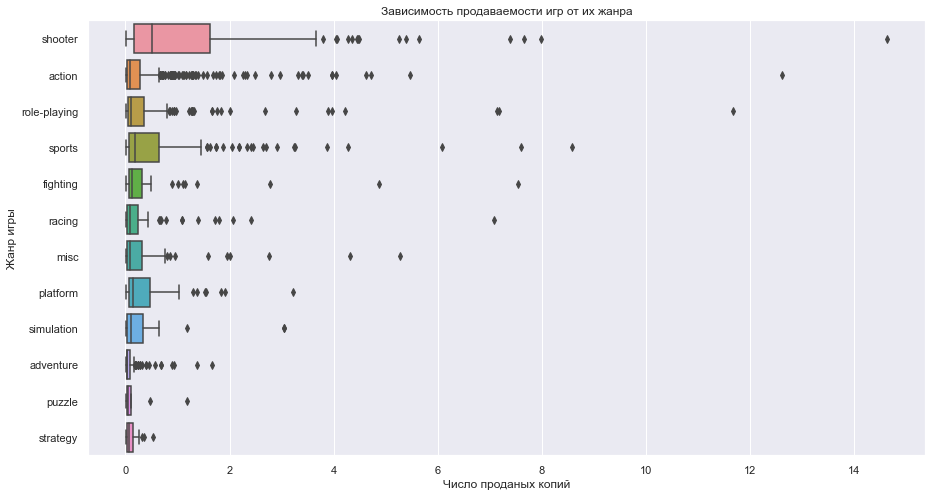

,genre,total_sales
0,action,199.36
1,shooter,170.94
2,sports,109.48
3,role-playing,101.44
4,misc,37.55
5,fighting,28.22
6,racing,27.52
7,platform,18.09
8,adventure,17.55
9,simulation,13.13


In [80]:
data_actual_genre = (data_actual
                     .pivot_table(index='genre', values='total_sales', aggfunc='sum')
                     .sort_values(by='total_sales', ascending=False)
                     .reset_index()
                    )
sns.set()
plt.figure(figsize=(15, 8))
sns.boxplot(data=data_actual, y='genre', x='total_sales')
plt.title('Зависимость продаваемости игр от их жанра')
plt.ylabel('Жанр игры')
plt.xlabel('Число проданых копий')
plt.show()
data_actual_genre

Самая продаваемая игра вышла в жанре shooer - она продалась тиражом в 14.5 млн. копий - это позволяет предположить (по предыдущим исследованиям), что эта игра вышла на ps4, потому что такая продаваемая игра была всего одна. 

Игры которые продались тиражом более 10 млн. копий принадлежат жанрам shooter, action и role-playing.
Хоть межквартильный размах жанра shooter явно больше чем у игр жанра action, можно сказать, что это связано с большим разбросом данных в играх этой категории, поэтому все-таки лучше продаются игры жанра action. 

Предлагаю рассмотреть данные без выбросов.

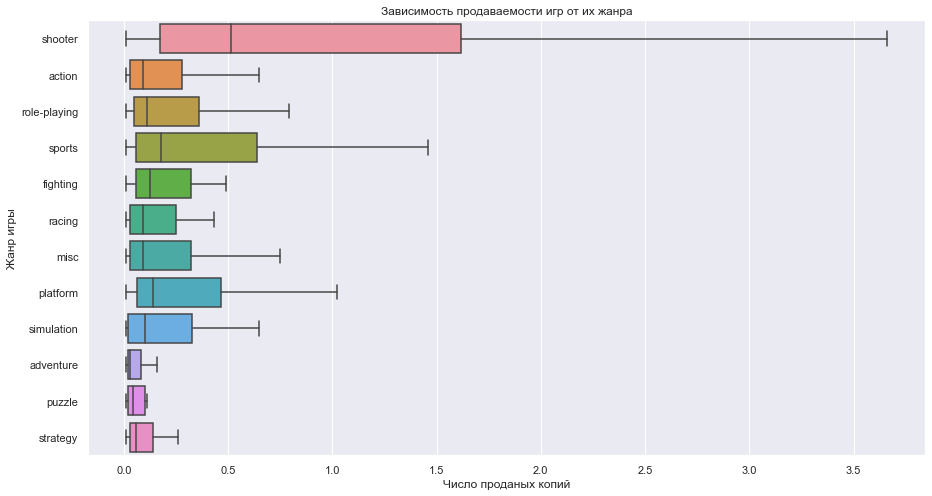

In [81]:
sns.set()
plt.figure(figsize=(15, 8))
sns.boxplot(
    data=data_actual,
    y='genre',
    x='total_sales',
    showfliers=False
)
plt.title('Зависимость продаваемости игр от их жанра')
plt.ylabel('Жанр игры')
plt.xlabel('Число проданых копий')
plt.show()


По данным вмидно, что самое большое медианное значение у жанра shooter, а самое маленькое у жанра advanture. Медианное значение жанра action, тоже дастаточно мало, возможно это можно объяснить тем, что в этом жанре выходит много малобюджетных игр, которые плохо продаются, но суммарыне продажи у этого жанра все равно самые высокие.

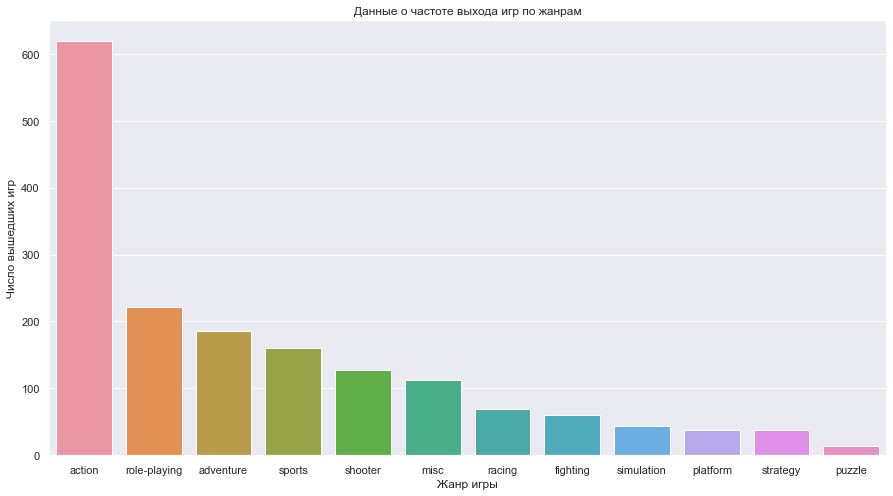

In [82]:
data_per_genre = (data_actual
                     .pivot_table(index='genre', values='name', aggfunc='count')
                     .sort_values(by='name', ascending=False)
                    )
plt.figure(figsize=(15, 8))
sns.barplot(data=data_per_genre, x=data_per_genre.index, y=data_per_genre['name'])
plt.title('Данные о частоте выхода игр по жанрам')
plt.xlabel('Жанр игры')
plt.ylabel('Число вышедших игр')
plt.show()

Самые прибыльные жанры это экшн игры, шутеры и ролевые игры. Что примечательно, при этом медианное значение продаваемости у экшн-игр значительно меньше чем у шутеров и немного меньше чем у ролевых игр.  Наименее прибыльными являются головоломки, приключенческие игры и стратегии. Между жанрами есть достаточно большая разница в продажах, даже между двумя самыми продаваемыми жанрами разница составляет примерно **50 млн.** проданых копий, а между самым популярным и самым не популярным жанром разница составляет примернл **220 млн.** копий.

Чаще всего выходят игры в жанре экшн, возможно с этим связана их высокая продаваемость. в отличае от продаваемости игр между первым местом и вторым (ролевые игры) разрыв очень большой - в жанре экшн вышло более **500-а** игр, а в жанре ролевых игр чуть больше **200-от**. Реже всего выпускают головоломки.

#### Общий вывод по исследовательскому анализу

   - большинство игр выпускалось в перидод с 2006 по 2007 год
   - самой популярной платформой за все время являлась PS2
   - популярность каждой платформы длится примерно 5 - 10 лет
   - пик популярности платформы приходится на год ее выпуска
   - актуальный период исследования - это период с 2013 года 
   - самыми перспективными на будующий год кажутся платформы **PS4**, **Xbox One** и **3DS**
   - самой популярной платформой на актуальный период являеься **PS4**, наименее актуальной **Wii**
   - существует зависимость между отзывами критиков и продажами игры
   - существует зависимость между отзывами пользователей и продажами игры, но только для некоторых платформ 
   - самым продоваемым жанром игр является экшн, наименне продоваемым - головоломки
   - чаще всего выходят игры в жанре экшн, реже всего - головоломки
    

### Составление портрета пользователя каждого региона

Необходимо определить ТОП-5 самых популярных платформ в регине, ТОП-5 самых популярных жанров и ответить на вопрос влияет ли рейтинг ESRB на продажи в каждом регионе.

#### Популярность платформ по регионам

In [83]:
platform_share_df = (data
                  .loc[data['year_of_release'] >= 2014]                    
                  .groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']] 
                  .agg('sum')                                                
                  .reset_index()
                 )                                                           
platform_share_df

,platform,na_sales,eu_sales,jp_sales
0,3ds,22.64,16.12,44.24
1,pc,7.23,17.97,0.00
2,ps3,22.05,25.54,11.22
3,ps4,98.61,130.04,15.02
4,psp,0.00,0.00,0.36
5,psv,2.52,3.53,14.54
6,wii,2.08,2.59,0.00
7,wiiu,19.36,13.15,7.31
8,x360,28.30,15.49,0.08
9,xone,81.27,46.25,0.32


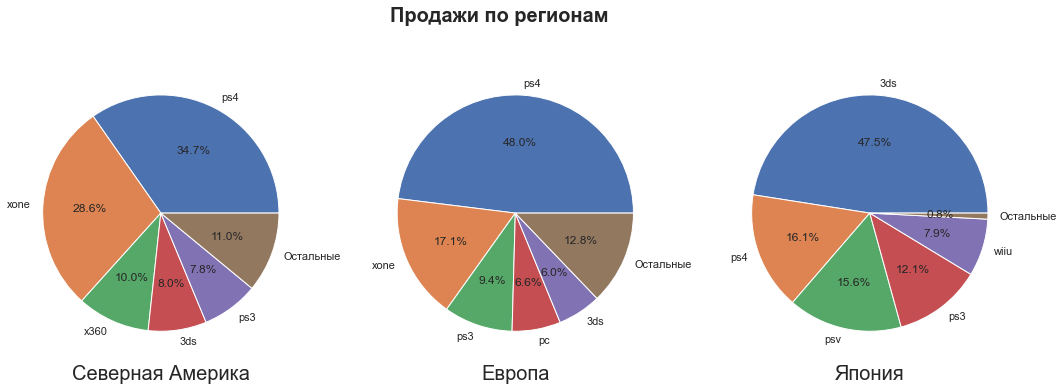

In [84]:
fig, axs = plt.subplots(ncols=3, figsize=(18, 6))
fields = [('Северная Америка','na_sales'),('Европа','eu_sales'),('Япония','jp_sales')]
for i, field in enumerate(fields):
    tmp_df = platform_share_df[['platform', field[1]]].sort_values(by=field[1], ascending=False).reset_index(drop=True)
    top_df = tmp_df.head(5).copy()
    top_df.loc[5] = tmp_df.loc[5:, field[1]].sum()
    top_df.loc[5, 'platform'] = 'Остальные'
 
    axs[i].pie(top_df[field[1]], labels=top_df['platform'], autopct='%1.1f%%')
    axs[i].set_xlabel(field[0], fontsize=20) 
fig.suptitle('Продажи по регионам', fontsize=20, fontweight='bold')
plt.show()

По данным видно, что в Северной Америке самой популярной платформой на актульный период является ps4, в Европе тоже, только ее доля от европейского рынка больше чем от американского (48%). В Японии самй популярной платформой является 3ds она занимает почти половину рынка, ps4 на японском рынке занимает 2-ое место по популярности. 

#### Популярность жанров игр по регионам

In [85]:
genre_share_df = (data
                  .loc[data['year_of_release'] >= 2014]                    
                  .groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']] 
                  .agg('sum')                                               
                  .reset_index()
                 )                                                           
genre_share_df

,genre,na_sales,eu_sales,jp_sales
0,action,72.53,74.68,29.58
1,adventure,5.64,6.49,3.60
2,fighting,12.43,6.69,6.37
3,misc,15.05,12.86,5.61
4,platform,6.79,6.80,2.69
5,puzzle,0.65,0.52,0.93
6,racing,8.74,14.13,1.76
7,role-playing,33.47,28.17,31.16
8,shooter,79.02,65.52,4.87
9,simulation,2.63,7.30,2.31


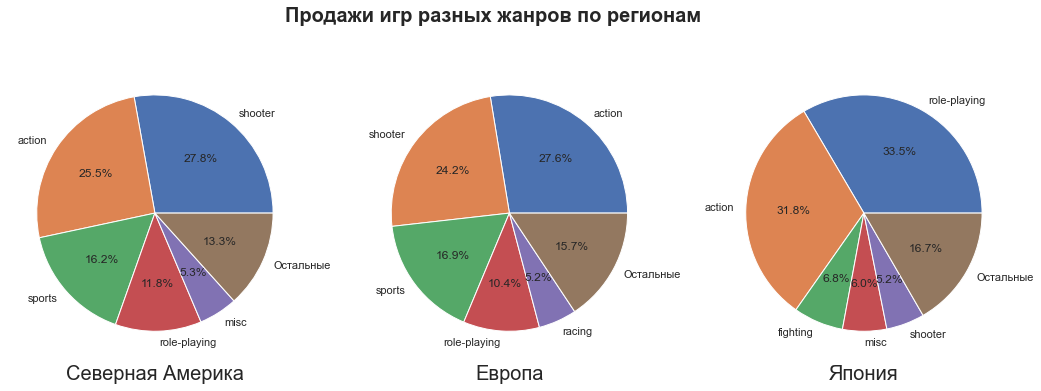

In [86]:
fig, axs = plt.subplots(ncols=3, figsize=(18, 6))
fields = [('Северная Америка','na_sales'),('Европа','eu_sales'),('Япония','jp_sales')]
for i, field in enumerate(fields):
    tmp_df = genre_share_df[['genre', field[1]]].sort_values(by=field[1], ascending=False).reset_index(drop=True)
    top_df = tmp_df.head(5).copy()
    top_df.loc[5] = tmp_df.loc[5:, field[1]].sum()
    top_df.loc[5, 'genre'] = 'Остальные'
 
    axs[i].pie(top_df[field[1]], labels=top_df['genre'], autopct='%1.1f%%')
    axs[i].set_xlabel(field[0], fontsize=20) 
fig.suptitle('Продажи игр разных жанров по регионам', fontsize=20, fontweight='bold')
plt.show()

По данным видно, что самым популярным жанром в Северной Америке является shooter, немногоим хуже продается жанр action разнича примерно в 2.3%. 

В Европе самым популярным жанром является action, а shooter занимает второе место с отставанием в 3.4%. В 

Японии первое место по жанрам занимет role-playing, на втором месте shooter с отсаванием всего в 1.7%.

#### Зависимомть продаваемости игр от рейтинга ESRB по регионам

In [87]:
rating_share_df = (data
                  .loc[data['year_of_release'] >= 2014]                    
                  .groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']] 
                  .agg('sum')                                                
                  .reset_index()
                 )                                                           
rating_share_df

,rating,na_sales,eu_sales,jp_sales
0,e,50.74,58.06,8.94
1,e10+,33.23,26.16,4.46
2,m,96.42,93.44,8.01
3,t,38.95,34.07,14.78


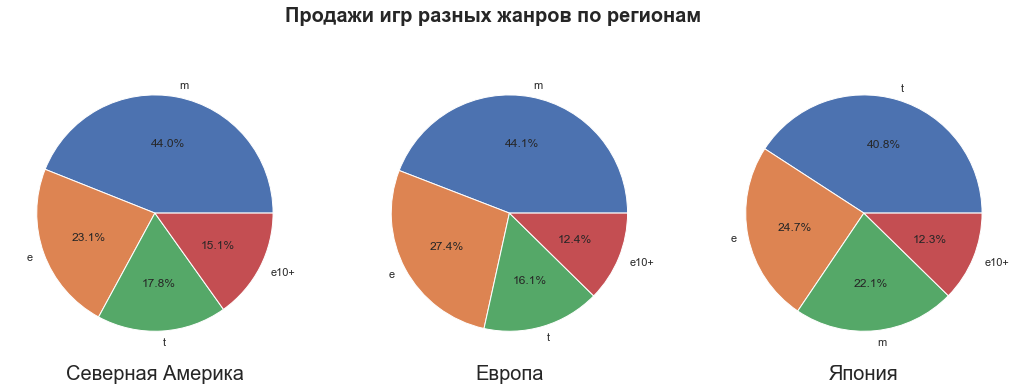

In [88]:
fig, axs = plt.subplots(ncols=3, figsize=(18, 6))
fields = [('Северная Америка','na_sales'),('Европа','eu_sales'),('Япония','jp_sales')]
for i, field in enumerate(fields):
    tmp_df = rating_share_df[['rating', field[1]]].sort_values(by=field[1], ascending=False).reset_index(drop=True)
    top_df = tmp_df.head(5).copy()
 
    axs[i].pie(top_df[field[1]], labels=top_df['rating'], autopct='%1.1f%%')
    axs[i].set_xlabel(field[0], fontsize=20) 
fig.suptitle('Продажи игр разных жанров по регионам', fontsize=20, fontweight='bold')
plt.show()

По данным видно, что в Серерной Америке чаще всего покупают игры с рейтингом M, на втором месте игры с рейтингом Е, на третьем Т и последнее место принадлежит играм с рейтингом Е10+.

В Европе разделение по рейтингу ESRB очень похоже на разделение в Америке, оно отлечается только процентным соотношением по части занимемого рынка. 

Япония и тут оказалась самым необычным регионом в ней чаще всего покупают игры с рейтингом Т, на втором месте игры с рейтингом Е, на третьем М и последнее место принадлежит играм с рейтингом Е10+.

#### Общий вывод

Пользователи всех трех изученных регионов достаточно сильно отличаются друг от друга, у них поплуярны разные игровые платформы, так же они различаются и в предпочтении игровых жанров. Резюмируя:

   - Самыми популярными жанрами в Северной Америке, Европе и Японии соответственно являются:  shooter, action и role-playing
   - Самыми популярными платформами в Северной Америке, Европе и Японии соответственно являются: PS4, PS4 и 3DS
   - Список самых популярных платформ в Европе и Северной Америке примерно одинаков они отличаются тол
   - В Японии популярны свои платформы, которые не так популярны в других регионах
   - Зависимость от рейтинга ESRB действительно имеет различае в регионах, больше всего разница видна в Японии
   - Самым неординарным регионом является Япония, у этого региона меньше всего сходств с остальными


### Проверка гипотез

#### Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H0 - средние пользовательские рейтинги по платформам XOne и PC равны
H1 - средние пользовательские рейтинги по платформам XOne и PC не равны

Для начала нам необходимо создать две выборки из датафрейма. Первая - оценки по платформе XOne, вторая - оценки по платформе PC. Cледует учесть, что платформа pc существует давно и не смысла сравнивать ее на всем периоде, поэтому рассмотрим данные с момента выхода XOne. Исходя из этого можем считать их дисперсии одинаковыми.

In [89]:
data_xone = data.query('platform == "xone" and user_score.notna()')['user_score']
data_pc = data.query('platform == "pc" and user_score.notna() and year_of_release >= 2013')['user_score']

hypothesis1 = st.ttest_ind(data_xone, data_pc)

print('Средняя оценка пользователей Xbox One равна', data_xone.mean())
print('Средняя оценка пользователей PC равна', data_pc.mean())
print('P-value равно:', hypothesis1.pvalue)

alpha = 0.05

if hypothesis1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

Средняя оценка пользователей Xbox One равна 6.521428
Средняя оценка пользователей PC равна 6.2696776
P-value равно: 0.1401276521001678
Не удалось отвергнуть нулевую гипотезу


Нам не удалось отвергнуть нулевую гипотезу, значит скорее всего оценки пользователй платформ XOne и PC и вправду одинаковы на актульном периоде. Судя по средним наших выборое это и вправду так.

#### Гипотеза 2. Средние пользовательские рейтинги жанров Action и Sports разные.

H0 - Средние ползьзовательские оценки игр жанра action и sports равны
H1 - Средние ползьзовательские оценки игр жанра action и sports не равны

Для начала нам необходимо создать две выборки из датафрейма. Первая - оценки по жанру action, вторая - оценки по жанру sprots. Судя по анализу проведенному выше жанр спорт-симуляторов всегда занимал второе место по популярности после экшн игр, но разница между ними была не большая, поэтому врядли из дисперсии будут сильно отличаться.

In [90]:
data_action = data.query('genre == "action" and user_score.notna()')['user_score']
data_sports = data.query('genre == "sports" and user_score.notna()')['user_score']

hypothesis2 = st.ttest_ind(data_action, data_sports)

print('Средняя оценка пользователей по жанру action равна', data_action.mean())
print('Средняя оценка пользователей по жанру sports равна', data_sports.mean())
print('P-value равно:', hypothesis2.pvalue)

alpha = 0.05

if hypothesis2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

Средняя оценка пользователей по жанру action равна 7.0581293
Средняя оценка пользователей по жанру sports равна 6.952778
P-value равно: 0.06833673460709556
Не удалось отвергнуть нулевую гипотезу


Нам не удалось отвергнуть нулевую гипотезу, значит сокрее всего оценки пользователей по жанрам action и sports действительно равны.

# Общий вывод

**Предобработка данных**

Обобщая, были получены данные достатчно хорошего качества, поэтому предобработку было сделать достаточно просто.

   - на этапе предобработки были убраны (если это возможно) пропуски данных
   - удалены дубликаты явные и неявные
   - проверены все аномальные значеия
   - процент потерянных данных составил примерно 0.02%
   - стоит обратить внмание, что процент потеряных данных на этапе предобработки столь мал, потому что изначальная цель проекта предусматривает то, что нам будет необходимо отсечь большой процент данных для анализа по актуальному периоду времени

**Исследователький анализ данных**

Обобщая, ислледовательский анализ данных позволил оценить актуальность игр и игровых платформ, и дал понять какой промежуток времени и какие игровые платформы необходимо выбрать, чтобы исследования были актуальны. Вот список более конкретных выводов по этапу предобработки:

- большинство игр выпускалось в перидод с 2006 по 2007 год
- самой популярной платформой за все время являлась PS2
- популярность каждой платформы длится примерно 5 - 10 лет   - пик популярности платформы приходится на год ее выпуска
- актуальный период исследования - это период с 2013 года 
- самыми перспективными на будующий год кажутся платформы **PS4**, **Xbox One** и **3DS**
- самой популярной платформой на актуальный период являеься **PS4**, наименее актуальной **Wii**
- существует зависимость между отзывами критиков и продажами игры
- существует зависимость между отзывами пользователей и продажами игры, но только для некоторых платформ 
- самым продоваемым жанром игр является экшн, наименне продоваемым - головоломки
- чаще всего выходят игры в жанре экшн, реже всего - головоломки
    
**Составлени портрета пользователя каждого региона**

Обобщая, составление портрета пользователя каждого региона в теории может помочь маркетологам определить на какой жанр игр и на какую платформу следует обращать внимание в каждом отдельном регионе. Эта информация должна быть очень полезна для планирования рекламной компании. Вот конкретные выводы, которые были получены на этом этапе:

   - Самыми популярными жанрами в Северной Америке, Европе и Японии соответственно являются:  action, action и role-playing
   - Самыми популярными платформами в Северной Америке, Европе и Японии соответственно являются: PS4, PS4 и 3DS
   - Список самых популярных платформ в Европе и Северной Америке примерно одинаков , только они встречаются в разном порядке
   - В Японии популярны свои платформы, которые не так популярны в других регионах
   - Зависимость от рейтинга ESRB действительно имеет различае в регионах, больше всего разница видна в Японии
   - Самым неординарным регионом является Япония, у этого региона меньше всего сходств с остальными
   - Пользователи всех трех изученных регионов достаточно сильно отличаются друг от друга, у них поплуярны разные игровые платформы, так же они различаются и в предпочтении игровых жанров
   
**Проверка гипотез**

- Проверка первой гипотезы (средние пользовательские рейтинги платформ Xbox One и PC одинаковые) позволила предположить то, что на самом деле средние оценки пользователей одинаковы на изучаемых нами платформах. Если судить по средним наших выборок - средняя оценка пользователя **PC** составляет **6.26** баллов, а средняя оценка пользователя **Xbox One** равна примерно **6.52** балла.

- Проверка второй гипотезы (средние пользовательские рейтинги жанров **Action** и **Sports** разные) позволяет считать, что пользовательски оценки примерно равны для двух исследуемых жанров. Если судить по средним исследуемых выборок, то эта гипотеза действительно отвергается - средняя оценка для жанра **Action** равна примерно **7.05** балла, а для жанра **Sports** примерно **6.96** балла.